In [47]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [16]:
# Loading the CIFAR dataset

(X_train, Y_train) , (X_test, Y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [18]:
print(X_train.ndim)
print(Y_train.ndim)

4
2


In [19]:
#reshaping target into 1-D
Y_train = Y_train.reshape(-1, )
Y_test = Y_test.reshape(-1, )

In [20]:
print(Y_train.ndim)
print(Y_test.ndim)

1
1


In [28]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [26]:
# Pixel of the first image
X_train[0, :]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

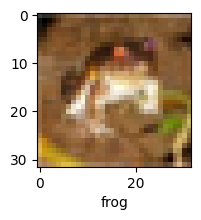

In [30]:
# printing the first image
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
plt.xlabel(classes[Y_train[0]])
plt.show()

In [39]:
# creating function
def sample_image(X, y, val):
    plt.figure(figsize=(15,2))
    plt.imshow(X[val])
    plt.xlabel(classes[y[val]])
    plt.show()

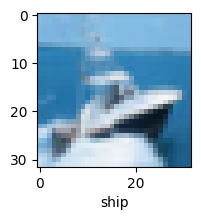

In [40]:
sample_image(X_train, Y_train, 8)

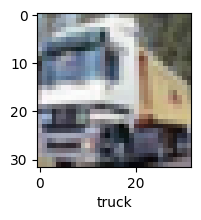

In [41]:
sample_image(X_train, Y_train, 1)

In [42]:
# Noramlise the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [43]:
X_train[0: ]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [48]:
# Model Building

model = models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')   # output
])

In [ ]:
# output class
# [dog, cat] - [0, 1] - Binary cross entropy
# [dog, cat, parot] - [0, 0, 1] - categorical cross entropy
# [dog, cat, parot, fish] - [0, 1, 2, 3] - sparse_categorical_crossentropy

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')